In [1]:
import pyjack
import numpy

In [2]:
numpy.random.seed(42)

my_data = numpy.random.randn(100,10)*0.3+4

obs = pyjack.observable(description='My Observable')
obs.create(my_data)
print(obs)

pyjack(4.001(26), 4.001(31), 3.985(30), 4.033(30), 4.024(31), 3.990(29), 3.986(28), 4.011(27), 4.009(27), 4.017(30), description=My Observable)


In [5]:
# Arithmetic operations casted for observables

squared = obs ** 2
exponential = pyjack.exp(obs)
summed = obs @ numpy.ones(my_data.shape[1])

print(squared)
print(exponential)
print(summed)

pyjack(16.01(21), 16.01(25), 15.88(24), 16.26(24), 16.19(25), 15.92(23), 15.89(22), 16.09(21), 16.07(22), 16.14(24), description=My Observable)
pyjack(54.7(14), 54.6(17), 53.8(16), 56.4(17), 55.9(17), 54.1(15), 53.8(15), 55.2(14), 55.1(15), 55.6(17), description=My Observable)
pyjack(40.058(94), description=My Observable)


[jackfit.fit] Fit did converge: [LevenbergMarquardt.minimize] Convergence with tolerance 1e-08 reached after 10 iterations. Exiting successfully
[jackfit.fit] chi2obs = 7.836280954852426
[jackfit.fit] chi2exp = 7.815914787314762 +- 1.105337269457296
[jackfit.fit] p-value = 0.4395 +- 0.004963510717613531
pyjack(4.009(17), 0.0032(36), description=Best parameters of fit)


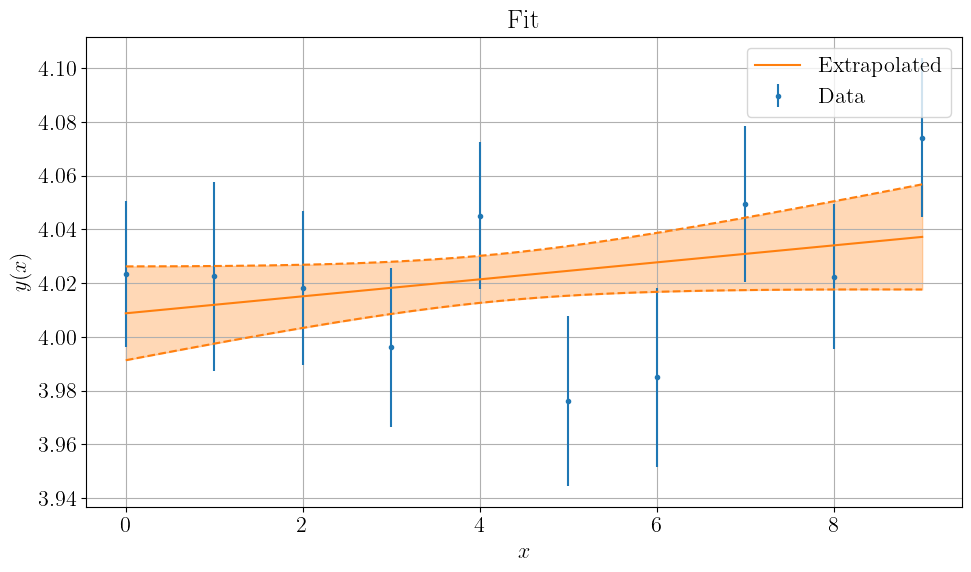

In [6]:
# Possibility to perform fits

import matplotlib.pyplot as plt
data = numpy.random.randn(100,10)*0.3+4
obs = pyjack.observable()
obs.create(data)
fitfunc = 'params0+params1*x'
initial_guess = [3,0]
W = 'diag'
fit1 = pyjack.jackfit(fitfunc,W,initial_guess)
fit1.fit(numpy.arange(obs.data.shape[1]),obs,max_iter=1000,tol=1e-8,num_samples=10000)
print(fit1.params)
fit1.plot()

In [ ]:
Increase statistics

new_data = numpy.random.randn(1000,10)*0.3+4

obs.increase_statistics(new_data)

fit1 = pyjack.jackfit(fitfunc,W,initial_guess)
fit1.fit(numpy.arange(obs.data.shape[1]),obs,max_iter=1000,tol=1e-8,num_samples=10000)
print(fit1.params)
fit1.plot()



pyjack(3.987(27), 4.044(27), 4.025(32), 3.968(26), 4.053(29), 3.988(29), 3.963(33), 4.047(30), 4.003(31), 3.970(31), description=None)

In [ ]:
# from data with shape (100,10) and new_data with shape (100) create a numpy array with shape (100,11)

def concatenate(data, new_data):
    if data.shape[0] != new_data.shape[0]:
        raise ValueError('data and new_data must have the same first dimension')
    while new_data.ndim < data.ndim:
        new_data = new_data[..., numpy.newaxis]
    if data.shape[1:-1] != new_data.shape[1:-1]:
        raise ValueError('Shape mismatch beyond the first and last dimensions')
    return numpy.concatenate((data, new_data), axis=-1)

# These two examples work
# concatenate(numpy.zeros((100,10,4)), numpy.zeros((100,10))) -> shape (100,10,5)
# concatenate(numpy.zeros((100,10)), numpy.zeros((100))) -> shape (100,11)
# while this one does not
# concatenate(numpy.zeros((100,10,4)), numpy.zeros((100)))

(100, 10, 5)